\setlength{\parindent}{0pt}  

Christopher Wilbar   
MSDS_422-DL_SEC55    
Assignment 3: Evaluating Regression Models

## 1. Summary and Problem Definition  

**Problem Definition:**   
A real estate brokerage firm desires to employ machine learning methods to complement conventional methods for assessing the market value of residential real estate. The firm seeks to use Boston Housing Study data to determine which linear modeling method performs best within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error. 

    
**Summary**: 
The Boston Housing Study is explored to highlight trends and correlations between 12 different explanatory variables and median house prices in 506 different cenus tracks. Different linear regression methods are explored within a cross-validation design and evaluated based on minimizing RMSE.

## 2. Results and Recommendations

**Results and Recomendations** 

1. The method producing the lowest average RMSE in a 10-fold cross-validation analysis is the Lasso Regression method, followed closely by the ElasticNet Regression method.

2. The Lasso and ElasticNet Regression Methods suggest there are a maximum of five explanatory variables with significant impacts on median house price: Crime Rate, Percentage of Homes Built Before 1940, Pupil/Teacher Ration in Public Schools, and Percentage of population of lower-economic status. In fact, one iteration suggested Crime Rate and Percentage of population of lower-economic status were the only two relevant models.

3. I reccomend using the Lasso Regression method if seeking to provide the most accurate prediction of house prices, and I reccomend using Ridge Regression instead of basic linear regression if the company wishes to understand how each of the explanatory variables affects house prices and not just the most relevant ones.


## 3. Research Design and Methods Used

**Research Design**   
The Boston Housing Study is a market response study of 506 census tracts in the Boston metropolitan area. Twelve different explanatory variables were collected in a census along with a response variable caluclated as the median price of homes in the specific census track.

**Methods Used**  
Pyhton v.3 Jupyter Notebook was created to perform the analysis.
The following packages were used:
pandas, numpy, matplotlip.pyplot, seaborn, sklearn, math
  
Basic pyhton descriptive statisitcs were generated. 
Because the response variable has meaningful magnitude, regression methods are appropriate.

Sci-kit learn was the primary tool for analysis to perfrom Logistic Regression and Naive Bayes models and perform standard classification model comparison techniques.

Linear, Ridge, Lasso, and Elastic Net regression methods where fit and evaluated in a 10-fold cross-validation design, caluclating RMSE as the index of prediction error.

## 4. Programming Work

### 4.1 | **Initial Setup**

In [21]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt  #plots
from matplotlib import rc

# modeling routines from Scikit Learn packages
import sklearn
import sklearn.linear_model 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation



In [2]:
#We next Define any functions that will be needed

def corr_chart(df_corr):   
    corr=df_corr.corr() 
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm',  
        center = 0, square=True,  #Center location and shape = square.
        linewidths=.5, cbar_kws={'shrink':.5}, #linewidth and colorbar parameters set.
        annot = True, annot_kws={'size': 9}, fmt = '.3f') #Annotation and annotation parameters, 3 decimals.       
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis) 
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   #title

### 4.2 | **Initial Expoloratory Data Analysis**

In [3]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

#General Description
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [4]:
#Clean-up the data and prepare for Analysis

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)


# ensure that floats are used for the DataFrame
boston.chas = pd.to_numeric(boston.chas, downcast='float')
boston.rad = pd.to_numeric(boston.rad, downcast='float')
boston.tax = pd.to_numeric(boston.tax, downcast='float')

# Drop any rows with N/A values
boston.dropna()

print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null float32
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null float32
tax        506 non-null float32
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float32(3), float64(10)
memory usage: 45.5 KB
None

Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253993    0.115878    0.702617   
m

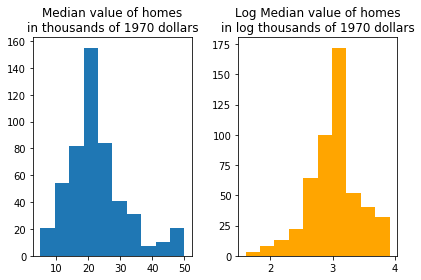

In [5]:
#Initial Plot of Response Variable
plt.subplot(1, 2, 1)
fig1 = plt.hist(boston.mv)
plt.title('Median value of homes\nin thousands of 1970 dollars')

plt.subplot(1, 2, 2)
fig2 = plt.hist(np.log(boston.mv),color='orange')
plt.title('Log Median value of homes\nin log thousands of 1970 dollars')

plt.tight_layout()
plt.show()

In [6]:
#Log values lessen the impact of the right-tail and make the distribution more normal. Reduces variance.
#Add log median value to the data frame
boston['lmv'] = np.log(boston.mv)
print(boston.loc[:,'mv':'lmv'].describe())

               mv         lmv
count  506.000000  506.000000
mean    22.528854    3.034558
std      9.182176    0.408275
min      5.000000    1.609438
25%     17.025000    2.834680
50%     21.200000    3.054001
75%     25.000000    3.218876
max     50.000000    3.912023


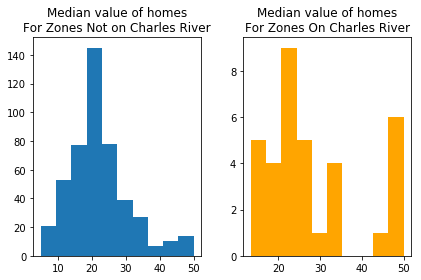

Median value of median value of homes for zones not on Charles River =  20.9
Median value of median value of homes for zones on Charles River =  23.3

Mean value of median value of homes for zones not on Charles River =  22.09
Mean value of median value of homes for zones on Charles River =  28.44


In [7]:
#Plot difference in distribution for house on vs. off the Charles
#Initial Plot of Response Variable
plt.subplot(1, 2, 1)
fig1 = plt.hist(boston['mv'][boston['chas']==0])
plt.title('Median value of homes\nFor Zones Not on Charles River')

plt.subplot(1, 2, 2)
fig1 = plt.hist(boston['mv'][boston['chas']==1], color = 'orange')
plt.title('Median value of homes\nFor Zones On Charles River')

plt.tight_layout()
plt.show()

print('Median value of median value of homes for zones not on Charles River = ', round(np.median(boston['mv'][boston['chas']==0]),3))
print('Median value of median value of homes for zones on Charles River = ', round(np.median(boston['mv'][boston['chas']==1]),3))

print('\nMean value of median value of homes for zones not on Charles River = ', round(np.mean(boston['mv'][boston['chas']==0]),3))
print('Mean value of median value of homes for zones on Charles River = ', round(np.mean(boston['mv'][boston['chas']==1]),3))

As expected, zones on the Charles are more expensive, on average, though this seems to be due to high-vlaue outliers since the mean value is higher than the median value, and "significantly" higher for zones on the Charles River. 

In [8]:
#Split data in to related/similar scale variables to get an initial sense of any correlations
# Will make it easier to display initial plots
# Response Variable included in all to see how it correlates as well
# Charles variable not included because it is a classification variable
percentages = boston[['zn','indus','age','lstat','lmv',]]
rates = boston[['crim','tax','ptratio','lmv']]
other = boston[['rooms','dis','rad','lmv']]

Pairplot for pecerntage explanatory variables:


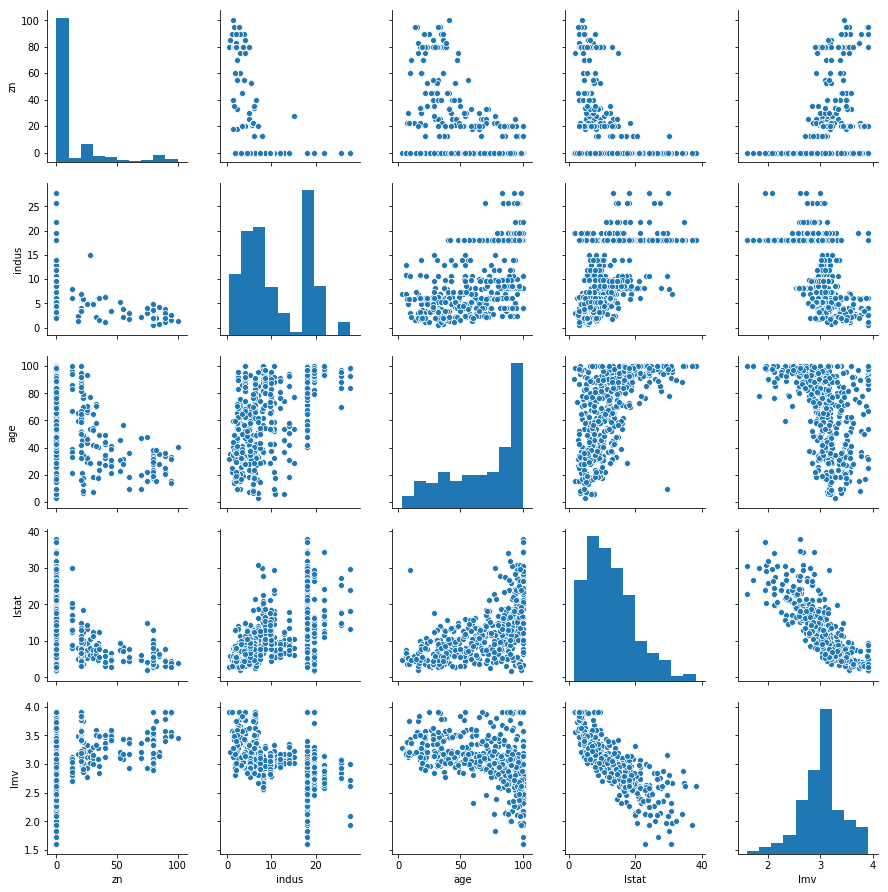

<Figure size 432x288 with 0 Axes>

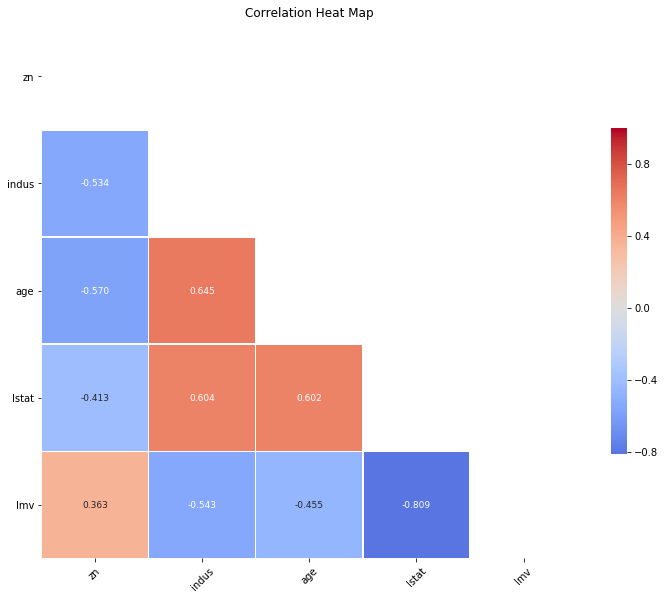

In [9]:
#Pairplots
print("Pairplot for pecerntage explanatory variables:")
sns.pairplot(percentages)

corr_chart(percentages)

Pairplot for rate-like explanatory variables:


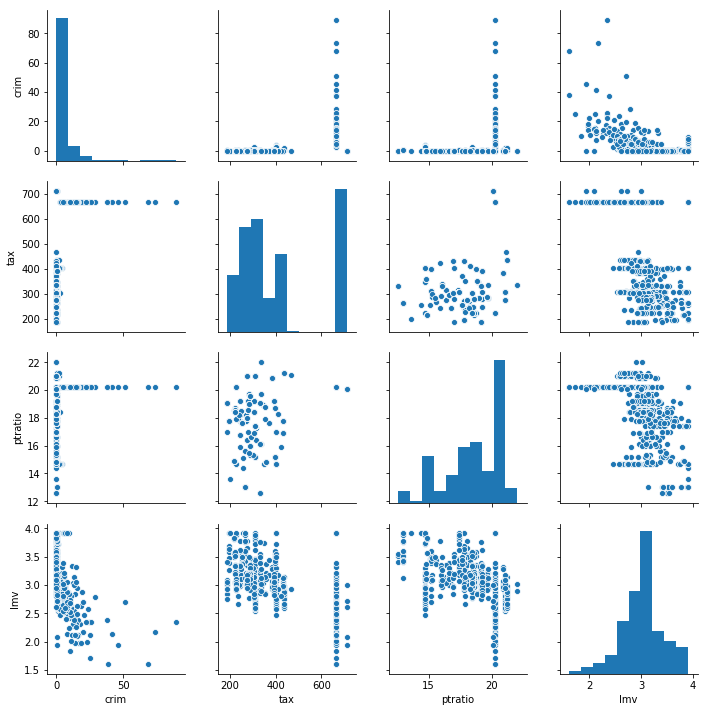

<Figure size 432x288 with 0 Axes>

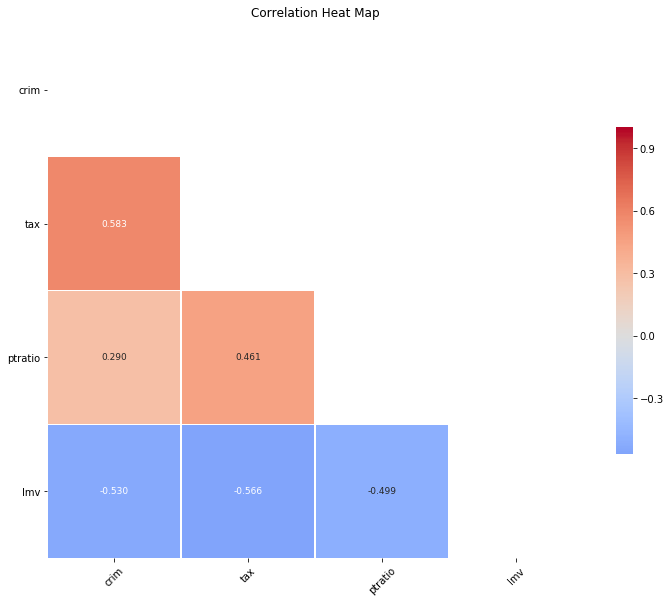

In [10]:
print("Pairplot for rate-like explanatory variables:")
sns.pairplot(rates)

corr_chart(rates)

In [11]:
# Unsure if Tax Rate of 666 is correct, or if an "unknown" value. Will leave in for now.
boston.tax.value_counts()

666.0    132
307.0     40
403.0     30
437.0     15
304.0     14
264.0     12
398.0     12
277.0     11
384.0     11
330.0     10
224.0     10
432.0      9
233.0      9
276.0      9
391.0      8
193.0      8
296.0      8
287.0      8
188.0      7
270.0      7
300.0      7
311.0      7
284.0      7
222.0      7
329.0      6
216.0      5
223.0      5
254.0      5
273.0      5
711.0      5
        ... 
345.0      3
293.0      3
430.0      3
245.0      3
358.0      3
242.0      2
411.0      2
348.0      2
402.0      2
252.0      2
337.0      2
335.0      2
265.0      2
315.0      2
370.0      2
334.0      2
352.0      2
351.0      1
226.0      1
256.0      1
244.0      1
241.0      1
198.0      1
285.0      1
422.0      1
187.0      1
255.0      1
313.0      1
469.0      1
280.0      1
Name: tax, Length: 66, dtype: int64

### 4.4 | **Model Evaluation and Selection**

In [12]:
# set up data for fitting the models 
# the first column is the log median housing value response
# the remaining columns are the explanatory variables
model_data = np.array([boston.lmv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

 Because the response variable has meaningful magnitude, regression methods are appropriate. We will evaluate within a 10-fold cross-validation design.

In [13]:
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 'ElasticNet_Regression'] 

regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT), 
              Ridge(alpha = 1, solver = 'cholesky', 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     normalize = False, 
                     random_state = RANDOM_SEED),
               Lasso(alpha = 0.1, max_iter=10000, tol=0.01, 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     random_state = RANDOM_SEED),
               ElasticNet(alpha = 0.1, l1_ratio = 0.5, 
                          max_iter=10000, tol=0.01, 
                          fit_intercept = SET_FIT_INTERCEPT, 
                          normalize = False, 
                          random_state = RANDOM_SEED)]

In [14]:
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

N_FOLDS = 10
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)


In [22]:
# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
    
#Model data will need to be standardized before use in modeling.
#Standaradization occurs on each train/test fold separately to improve generalization to new data.
#We will ues sklearn's Standard Scaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
# Should use the train scaler!    scaler = StandardScaler().fit(X_test)
    X_test_scaled = scaler.fit_transform(X_test)
        
    
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train_scaled.shape)
    print('X_test:',X_test_scaled.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train_scaled, y_train)  # fit on the train set for this fold
        print('Fitted regression intercept:', reg_model.intercept_)
        print('Fitted regression coefficients:', reg_model.coef_)

        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test_scaled)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Fitted regression intercept: 3.6592881361642506
Fitted regression coefficients: [-0.9481882   0.14224317  0.05062227  0.10709911 -0.39093773  0.39773574
  0.03491181 -0.59867867  0.29673545 -0.34050252 -0.31768904 -1.15084896]
Coefficient of determination (R-squared): -6.466808394969575
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
Root mean-squared error: 0.7289859200817084

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='cholesky', tol=0.001)
Fitted regression intercept: 3.571946538138

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
Root mean-squared error: 0.7268560152307036

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='cholesky', tol=0.001)
Fitted regression intercept: 3.588802760653248
Fitted regression coefficients: [-0.69957226  0.1003433   0.05866234  0.1429764  -0.36325954  0.38711173
 -0.00211555 -0.42391987  0.20673568 -0.26971111 -0.30635795 -1.04933181]
Coefficient of determination (R-squared): -4.928236240877148
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.6496280158157798

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_sta

In [23]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')     
print(cv_results_df.mean())   



----------------------------------------------
Average results from 10-fold cross-validation
in standardized units (mean 0, standard deviation 1)

Method               Root mean-squared error
Linear_Regression        0.589020
Ridge_Regression         0.535222
Lasso_Regression         0.393698
ElasticNet_Regression    0.379581
dtype: float64


In [17]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'lstat', 'mv', 'lmv'],
      dtype='object')

Lowest RMSE is Lasso Regression, though you lose info on how most explanatory varaibles affect log median price. Use Lasso Regression to get the least prediction error, but use Ridge Regression if you want to see effects of each possible explanatory variable. Per the Lasso and ElasticNet regression, the most relevant predictors are crim,age,ptratio,lstat. There is some significant variance in the RMSE between folds, however, though Lasso and ElasticNet do consistently perform best.